In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns
from utils import load_all_batches

folderpath = r"gas+sensor+array+drift+dataset/Dataset"
df = load_all_batches(folderpath)

In [2]:
# Features und Gasart extrahieren
X = df.iloc[:, 0:128].values
y = df.iloc[:, 128].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [3]:
# init Random Forest
rf = RandomForestClassifier(
    n_estimators=100,       
    max_depth=None,         
    random_state=42,
    n_jobs=-1               
)
rf.fit(X_train, y_train)


# Vorhersage & Evaluation
y_pred = rf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9953

Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.99      1.00       513
           2       0.99      1.00      0.99       585
           3       1.00      0.99      1.00       328
           4       1.00      0.99      0.99       387
           5       0.99      1.00      1.00       602
           6       0.99      1.00      1.00       367

    accuracy                           1.00      2782
   macro avg       1.00      0.99      1.00      2782
weighted avg       1.00      1.00      1.00      2782



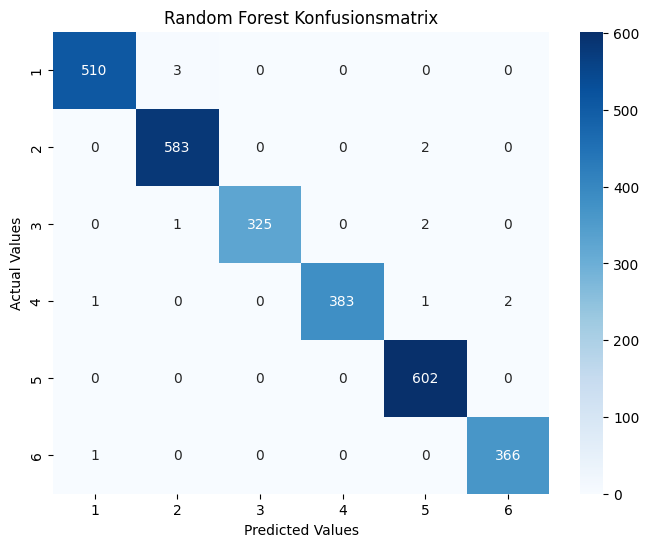

In [4]:
# Konfusionsmatrix
confmat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(confmat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Random Forest Konfusionsmatrix")
plt.show()

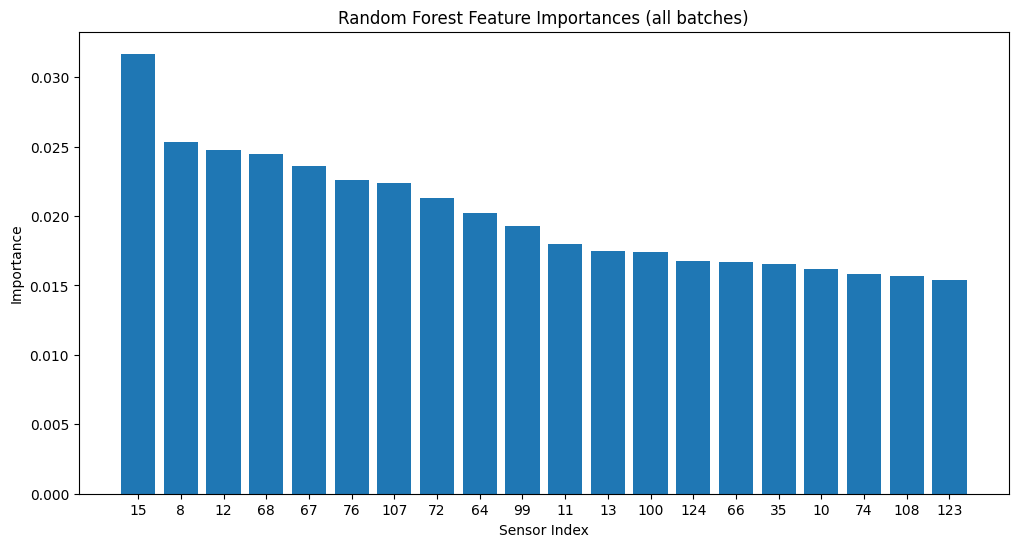

In [5]:
# Feature Importance von Random Forest
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title("Random Forest Feature Importances (all batches)")
plt.bar(range(20), importances[indices[:20]], align="center")
plt.xticks(range(20), indices[:20])
plt.xlabel("Sensor Index")
plt.ylabel("Importance")
plt.show()

In [6]:
# 5-Fold Crossvalidation

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_cv = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

cv_scores = cross_val_score(rf_cv, X, y, cv=kf, scoring="accuracy")

print(f"Crossvalidation Accuracies: {cv_scores}")
print("Mean Acc: {:.4f}".format(cv_scores.mean()))
print("Std Deviation: {:.4f}".format(cv_scores.std()))

Crossvalidation Accuracies: [0.99245147 0.99352983 0.99388929 0.9953271  0.9953271 ]
Mean Acc: 0.9941
Std Deviation: 0.0011
